# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [4]:
import main
import scipy
from scipy.linalg import solve_triangular
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [5]:
m = 50
n = 12
A, b = main.spare_matrix_Abt(m, n)

# Podpunkt 1

def method1(A, b):
    A_1, b_1 = main.square_from_rectan(A, b)
    result_0 = np.linalg.solve(A_1, b_1)
    return result_0
print("Rozwiązanie dla podpunktu 1")
print(method1(A, b), '\n')
print("Norma dla rozwiązania układu równań korzystając z przekształceń na macierz kwadratową z funkcji stworzonej \
w main'ie: ", main.residual_norm(A, method1(A, b), b), '\n')

print('CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY')
print('Timing: ')
saved_timing = %timeit -r 10 -n 20 -o method1(A, b)
saved_timing.average   # średni czas próby
saved_timing.stdev     # odchylenie standardowe
print('Memory usage: ')
%memit method1(A, b)
print('\n')

# Podpunkt 2

def method2(A, b):
    result_1 = np.linalg.lstsq(A, b, rcond=-1)[0]
    return result_1

print("Rozwiązanie dla podpunktu 2")
print(method2(A, b), '\n')
print("Norma dla rozwiązania układu równań z macierzą prostokątną za pomocą funckji lstsq:", '\n',
      main.residual_norm(A, method2(A, b), b), '\n')

print('CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY')
print('Timing: ')
saved_timing = %timeit -r 10 -n 20 -o method2(A, b)
saved_timing.average   # średni czas próby
saved_timing.stdev     # odchylenie standardowe
print('Memory usage: ')
%memit method2(A, b)
print('\n')

# Podpunkt 3

def method3(A, b):
    Q, R = np.linalg.qr(A)
    Q_t = np.transpose(Q)
    result_2 = solve_triangular(R, Q_t@b)
    return result_2

print("Rozwiązanie dla podpunktu 3")
print(method3(A, b), '\n')
print("Norma dla rozwiązania układu równań stosując rozkład QR macierzy oraz funkcji solve: ", '\n',
      main.residual_norm(A, method3(A, b), b), '\n')

print('CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY')
print('Timing: ')
saved_timing = %timeit -r 10 -n 20 -o method3(A, b)
saved_timing.average   # średni czas próby
saved_timing.stdev     # odchylenie standardowe
print('Memory usage: ')
%memit method3(A, b)
print('\n')

# Podpunkt 4

def method4(A, b):
    U,s,V = np.linalg.svd(A, full_matrices=False)
    S = np.diag(s)
    result_3 = V.T @ np.linalg.solve(S,U.T@b)
    return result_3

print("Rozwiązanie dla podpunktu 4")
print(method4(A, b), '\n')
print("Norma dla rozwiązania układu równań stosując rozkład SVD macierzy oraz funkcji solve: ", '\n',
      main.residual_norm(A, method4(A, b), b), '\n')

print('CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY')
print('Timing: ')
saved_timing = %timeit -r 10 -n 20 -o method4(A, b)
saved_timing.average   # średni czas próby
saved_timing.stdev     # odchylenie standardowe
print('Memory usage: ')
%memit method4(A, b)
print('\n')

Rozwiązanie dla podpunktu 1
[ 9.99999973e-01  7.87436649e-06 -8.00029484e+00  4.32313845e-03
  1.06337679e+01  1.47582860e-01 -6.10578772e+00  7.66441836e-01
  6.97307038e-01  7.40518287e-01 -6.80965844e-01  1.43455873e-01] 

Norma dla rozwiązania układu równań korzystając z przekształceń na macierz kwadratową z funkcji stworzonej w main'ie:  1.3204737207184956e-07 

CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY
Timing: 
16.5 µs ± 2.94 µs per loop (mean ± std. dev. of 10 runs, 20 loops each)
Memory usage: 
peak memory: 104.98 MiB, increment: 0.01 MiB


Rozwiązanie dla podpunktu 2
[ 1.00000000e+00 -4.22743385e-07 -7.99998124e+00 -3.18763318e-04
  1.06694308e+01 -1.38202899e-02 -5.64707562e+00 -7.53160319e-02
  1.69360697e+00  6.03210333e-03 -3.74241701e-01  8.80405757e-02] 

Norma dla rozwiązania układu równań z macierzą prostokątną za pomocą funckji lstsq: 
 7.999154699930757e-09 

CZAS WYKONANIA ORAZ ZUŻYTA PAMIĘĆ POWYŻSZEJ METODY
Timing: 
72.7 µs ± 12.7 µs per loop (mean ± std. 

KOMENTARZ:

Jak widać dla powyższych wyników, metody: 2-ga, 3-cia i 4-ta mają bardzo zbliżone do siebie wartości norm, tylko 1-sza metoda znacząco odstaje od reszty, co jest zrozumiałe zaglądając w jej rozwiązanie -> co drugi element znacząco różni się od rozwiązania rzeczywistego. Wyniki te mogą wynikać z implementacji funkcji spare_matrix_Abt, gdzie odczyt wartości wektora b może być niedokładny (pomocniczy wektor t mający 50 równoogległych wartości z zakresu <0, 1> wkładamy do wzoru b = cos(4*t) , co sprawia, że pracujemy na skomplikowanych ułamkach i dostajemy nieprecyzyjne wyniki). Wszystkie metody zużywają wręcz taką samą ilośc pamięci, natomiast potrzebują różną ilość czasu na wykonanie. Pod tym względem "nasza" metoda z funkcji main wypada najlepiej, lecz nie daje prawidłowych wyników. Podejrzewam, że inne metody potrzebują  więcej czasu ze względu na optymalizacje w nich zastosowane pod kątem otrzymywania prawidłowych wyników. Aby uzyskać zadowalające rezultaty w jak najkrótszym czasie należałoby skorzystać z domyślnej metody Pythona do rozwiązywania układów równań z macierzą prostokątną -> lstsq.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

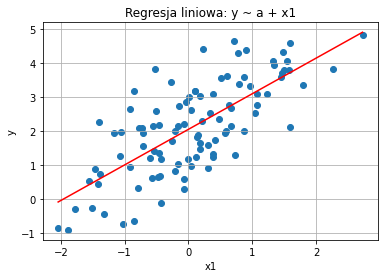

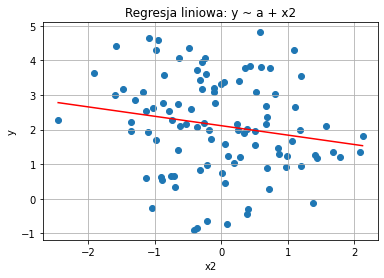

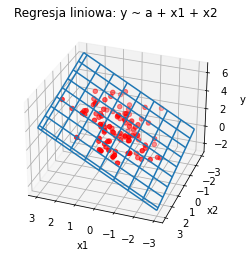

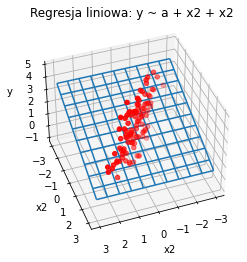

In [3]:
# Podpunkt 1

x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))

# Podpunkt 2

e = np.random.normal(0, 1, (100, 1))
y = 2 + x1 - 0.5*x2 + e

# Podpunkt 3

ones = np.ones((100, 1))
x1_conc = np.concatenate((ones, x1), axis=1)
x2_conc = np.concatenate((ones, x2), axis=1)
x1x2_conc = np.concatenate((ones, x1, x2), axis=1)

# Podpunkt 4

# A) y ~ a + x1

Q, R = np.linalg.qr(x1_conc)
beta = np.linalg.solve(R, Q.T @ y)
pred1=[min(x1), max(x1)]
y_aprox = beta[0] + beta[1] * pred1

plt.scatter(x1,y)
plt.plot(pred1, y_aprox, "r")
plt.grid()
plt.title("Regresja liniowa: y ~ a + x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

# B y ~ a + x2

Q, R = np.linalg.qr(x2_conc)
beta = np.linalg.solve(R, Q.T @ y)
pred2=[min(x2), max(x2)]
y_aprox = beta[0] + beta[1] * pred2

plt.scatter(x2,y)
plt.plot(pred2, y_aprox, "r")
plt.grid()
plt.title("Regresja liniowa: y ~ a + x2")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

# C) y ~ a + x1 + x2

Q, R = np.linalg.qr(x1x2_conc)
beta = np.linalg.solve(R, Q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja liniowa: y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(30,110)
plt.show()

# D) y ~ a + x2 + x2

Q, R = np.linalg.qr(x2_conc)
beta = np.linalg.solve(R, Q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x2
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x2")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja liniowa: y ~ a + x2 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * Y + beta[1] * Y
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride=10)
ax.view_init(40,70)
plt.show()

#### Wnioski:

Na tych laboratoriach zapoznalismy się z tematyką rozwiązywania układów równań z macierzą prostokątną. Niestety takie układy bardzo rzadko mają rozwiązanie, dlatego macierz A tworzymy jako macierz rzadką, co zapewnia rozwiązanie układu. Nauczyliśmy się różnych metod rozwiązywania takiego układu: np. poprzez sprowadzenie układu do takiego zawierającego macierze kwadratowe lub rozkład SVD czy QR. W następnym zadaniu wyznaczaliśmy linię regresji stosując poznany rozkład QR dla połączonych wektorów (będących de facto macierzami prostokątnymi). Zastosowanie takich metod jest bardzo pomocne, choć sprawdza się w dość wąskich dziedzinach jak choćby poznane obliczanie regresji liniowej.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)